In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
from bitcoin.validation import test_model
import numpy as np

df = test_model()

2018-03-24 20:30:53,271 root         INFO     Load data from SQL.
2018-03-24 20:30:53,554 root         INFO     Train Scaler Model
2018-03-24 20:30:53,836 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            161600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/50
18263/18263 [==============================] - 2s 96us/step - loss: 42.5395 - mean_squared_error: 0.0255 - mean_absolute_error: 0.1276 - val_loss: 40.5621 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0521
Epoch 31/50
18263/18263 [==============================] - 2s 94us/step - loss: 40.6124 - mean_squared_error: 0.0173 - mean_absolute_error: 0.1023 - val_loss: 38.6910 - val_mean_squared_error: 8.6083e-04 - val_mean_absolute_error: 0.0260
Epoch 32/50
18263/18263 [==============================] - 2s 94us/step - loss: 38.7422 - mean_squared_error: 0.0110 - mean_absolute_error: 0.0772 - val_loss: 36.9113 - val_mean_squared_error: 1.2695e-04 - val_mean_absolute_error: 0.0097
Epoch 33/50
18263/18263 [==============================] - 2s 93us/step - loss: 36.9566 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0549 - val_loss: 35.2265 - val_mean_squared_error: 6.2666e-04 - val_mean_absolute_error: 0.0239
Epoch 34/50
18263/18263 [===========================

2018-03-24 20:32:27,770 root         INFO     Load data from SQL.
2018-03-24 20:32:27,979 root         INFO     Test set of 945 items !


In [21]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

print("evs: %f" % explained_variance_score(df['real'], df['predicted']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted']))

regul = df['diff'].median()
df['predicted_regul'] = df['predicted'] + regul
df['diff_regul'] = df['real'] - (df['predicted'] + regul)
print(df.describe())


print("evs: %f" % explained_variance_score(df['real'], df['predicted_regul']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted_regul']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted_regul']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted_regul']))



evs: 0.987283
mae: 15.143048
msr: 252.977966
mdae: 15.140000
              real    predicted        diff  predicted_regul  diff_regul
count   945.000000   945.000000  945.000000       945.000000  945.000000
mean   7178.801820  7163.962942   14.838878      7179.092942   -0.291122
std      50.801682    49.398890    5.728908        49.398890    5.728908
min    7043.700000  7031.320000  -18.740000      7046.450000  -33.870000
25%    7161.060000  7150.780000   13.000000      7165.910000   -2.130000
50%    7194.370000  7179.240000   15.130000      7194.370000    0.000000
75%    7216.920000  7201.070000   16.050000      7216.200000    0.920000
max    7265.810000  7249.030000   66.090000      7264.160000   50.960000
evs: 0.987283
mae: 2.939270
msr: 32.870409
mdae: 1.050000


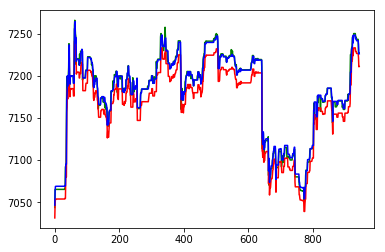

In [22]:
plt.plot(df['real'], color='g')
plt.plot(df['predicted'], 'r')
plt.plot(df['predicted_regul'], 'b')

In [12]:
df[df.isnull().any(axis=1)]

,real,predicted,diff


In [13]:
df.describe()

,real,predicted,diff
count,945.000000,945.000000,945.000000
mean,7178.801820,7202.261079,-23.459259
std,50.801682,49.148368,5.781845
min,7043.700000,7069.980000,-56.710000
25%,7161.060000,7189.240000,-25.470000
50%,7194.370000,7217.520000,-23.150000
75%,7216.920000,7239.160000,-21.980000
max,7265.810000,7286.610000,27.400000


In [14]:
df.corr()

,real,predicted,diff
real,1.000000,0.993853,0.338202
predicted,0.993853,1.000000,0.231939
diff,0.338202,0.231939,1.000000


In [15]:
plt.plot(df['close'], 'b')

KeyError: 'close'

In [ ]:
max = df['open'].count()
limit = int(0.3 * max)
plt.plot(df['open'][0:max - limit], 'g')
plt.plot(df['open'][-limit:], 'r')

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
from bitcoin.core import Core
core = Core()
core.train_scaler(df=df)

In [ ]:
from bitcoin.core import Core
core = Core()
history = core.train(df=df)

In [ ]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [ ]:
core.train_anomaly(df=df)

In [ ]:
df_predicted = core.test_order_percent(df=df)

In [ ]:
df_predicted.describe()

In [ ]:
n_test = int(0.3 * df['open'].count())
df_test = df[-n_test:].reset_index()
plt.plot(df_test['close'], 'g')
plt.plot(df_predicted['predicted'], 'r')